In [1]:
#importing needed libraries
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
df = pd.read_csv(r"C:\Users\vedan\Downloads\data.csv",encoding='ISO-8859-1')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


**EXPLORING DATA**

In [3]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
print(df.isna().sum() , "\n")
print(df.shape)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64 

(541909, 8)


In [6]:
df.dropna(subset = 'CustomerID', inplace = True )

In [7]:
print(df.isna().sum(), "\n")
print(df.shape)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64 

(406829, 8)


In [8]:
df.duplicated().sum()

5225

In [9]:
df.drop_duplicates(inplace = True)
df.shape

(401604, 8)

**DATA ANALYSIS**

In [10]:
df["CustomerID"].value_counts()

CustomerID
17841.0    7812
14911.0    5898
14096.0    5128
12748.0    4459
14606.0    2759
           ... 
18068.0       1
13256.0       1
15590.0       1
16138.0       1
15389.0       1
Name: count, Length: 4372, dtype: int64

In [11]:
df["StockCode"].value_counts()

StockCode
85123A    2065
22423     1894
85099B    1659
47566     1409
84879     1405
          ... 
90104        1
90135        1
90027D       1
90027A       1
84746        1
Name: count, Length: 3684, dtype: int64

In [12]:
df["Description"].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER    2058
REGENCY CAKESTAND 3 TIER              1894
JUMBO BAG RED RETROSPOT               1659
PARTY BUNTING                         1409
ASSORTED COLOUR BIRD ORNAMENT         1405
                                      ... 
PINK/WHITE GLASS DEMI CHOKER             1
 I LOVE LONDON MINI RUCKSACK             1
SET 36 COLOURING PENCILS DOILEY          1
SET 12 COLOURING PENCILS DOILEY          1
PEARL AND CHERRY QUARTZ BRACLET          1
Name: count, Length: 3896, dtype: int64

In [13]:
df["Country"].value_counts()

Country
United Kingdom          356728
Germany                   9480
France                    8475
EIRE                      7475
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1471
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     247
Unspecified                241
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45


**FEATURE ENGINEERING**

In [14]:
# ChangING tdata type of InvoiceDate column from object to datetime

In [15]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [16]:
df["Month"] = df["InvoiceDate"].dt.month

In [17]:
df["Year"] = df["InvoiceDate"].dt.year

In [18]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,2011
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,2011


In [19]:
#Create new column total_bill to show the actual amount of one purchase

In [20]:
df['total_bill'] = df['Quantity']*df['UnitPrice']

In [21]:
# Create annual_total_bill using merge and groupby functions

In [22]:
annual_bill = df.groupby('CustomerID')['total_bill'].sum()
df= df.merge(annual_bill, on='CustomerID', suffixes=('','_annualy'))
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,total_bill,total_bill_annualy
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,15.30,5303.48
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34,5303.48
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,22.00,5303.48
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34,5303.48
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34,5303.48
...,...,...,...,...,...,...,...,...,...,...,...,...
401599,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:16:00,1.25,12713.0,Germany,12,2011,15.00,848.55
401600,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09 12:16:00,0.85,12713.0,Germany,12,2011,10.20,848.55
401601,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09 12:16:00,0.85,12713.0,Germany,12,2011,10.20,848.55
401602,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09 12:16:00,2.08,12713.0,Germany,12,2011,24.96,848.55


In [23]:
data=df.copy()
# GROSS ORDER VALUE
data['GOV']=data['Quantity']*data['UnitPrice']
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])
#year
data['Year']=data['InvoiceDate'].dt.year
#data['Month']=data['InvoiceDate'].dt.month
data['DateYM']=data['InvoiceDate'].dt.to_period('M')
data['Day of the week']=data['InvoiceDate'].dt.dayofweek


In [24]:
#ploting the spent of the yaar
import matplotlib.pyplot as plt

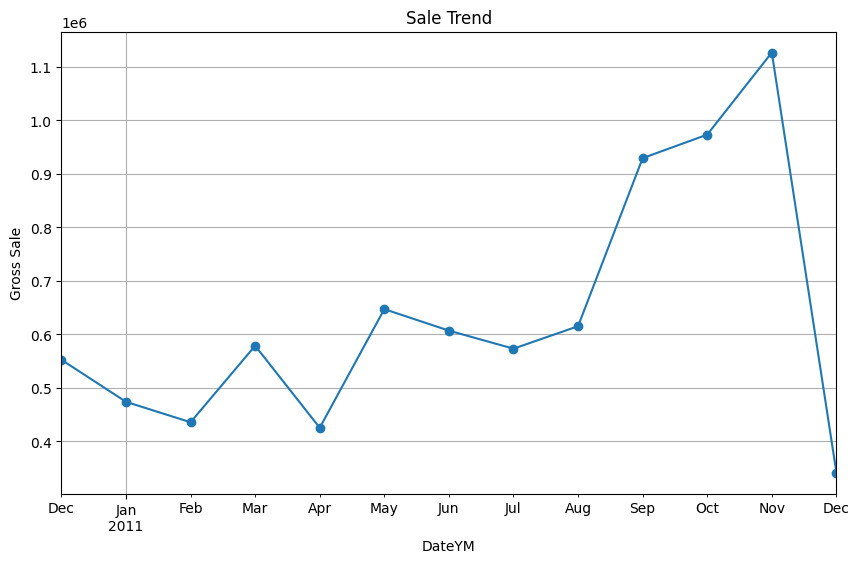

In [49]:
plt.figure(figsize=(10,6))
data.groupby('DateYM')['GOV'].sum().plot(marker='o')
plt.grid(axis='both')
plt.ylabel('Gross Sale')
plt.title('Sale Trend')
plt.show()

#### Weekly Data

In [50]:
data.rename(columns={'Day of the week': 'Day_of_the_week'}, inplace=True)
grouped=data.groupby('Day_of_the_week').agg({'GOV':'sum','InvoiceNo':'nunique'})
grouped=grouped.reset_index().rename(columns={'GOV':'Gross_Sales_day','InvoiceNo':'Total Order/day'})
grouped


,Day_of_the_week,Gross_Sales_day,Total Order/day
0,0,1271078.601,3512
1,1,1562715.681,3892
2,2,1526440.000,4110
3,3,1902316.050,4978
4,4,1238556.741,3356
5,6,777412.351,2342


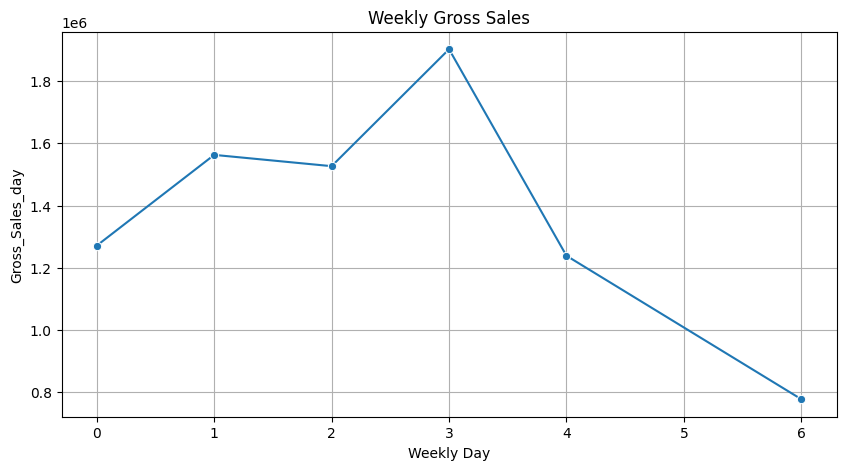

In [67]:
plt.figure(figsize=(10,5))
sns.lineplot(x = grouped['Day_of_the_week'] ,y = grouped['Gross_Sales_day'], marker='o')
plt.grid()

plt.xlabel("Weekly Day")
plt.ylabel("Gross_Sales_day")
plt.title("Weekly Gross Sales")
plt.show()

In [27]:
grouped=data.groupby('Country').agg({'GOV':'sum'}).reset_index().rename(columns={'GOV':'Gross sales'}).sort_values(by='Gross sales',ascending=False).head(10)
grouped

,Country,Gross sales
35,United Kingdom,6747156.154
23,Netherlands,284661.540
10,EIRE,250001.780
14,Germany,221509.470
13,France,196626.050
0,Australia,137009.770
32,Switzerland,55739.400
30,Spain,54756.030
3,Belgium,40910.960
31,Sweden,36585.410


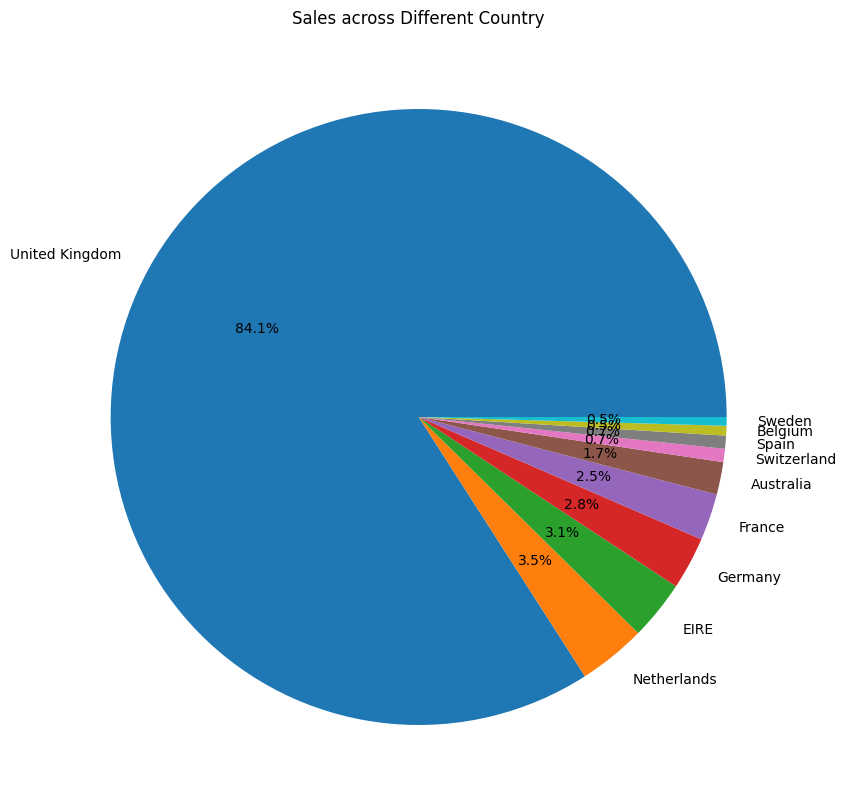

In [28]:
plt.figure(figsize=(10,10))
plt.pie(grouped['Gross sales'],labels = grouped['Country'],autopct='%1.1f%%')
plt.title("Sales across Different Country")
plt.show()

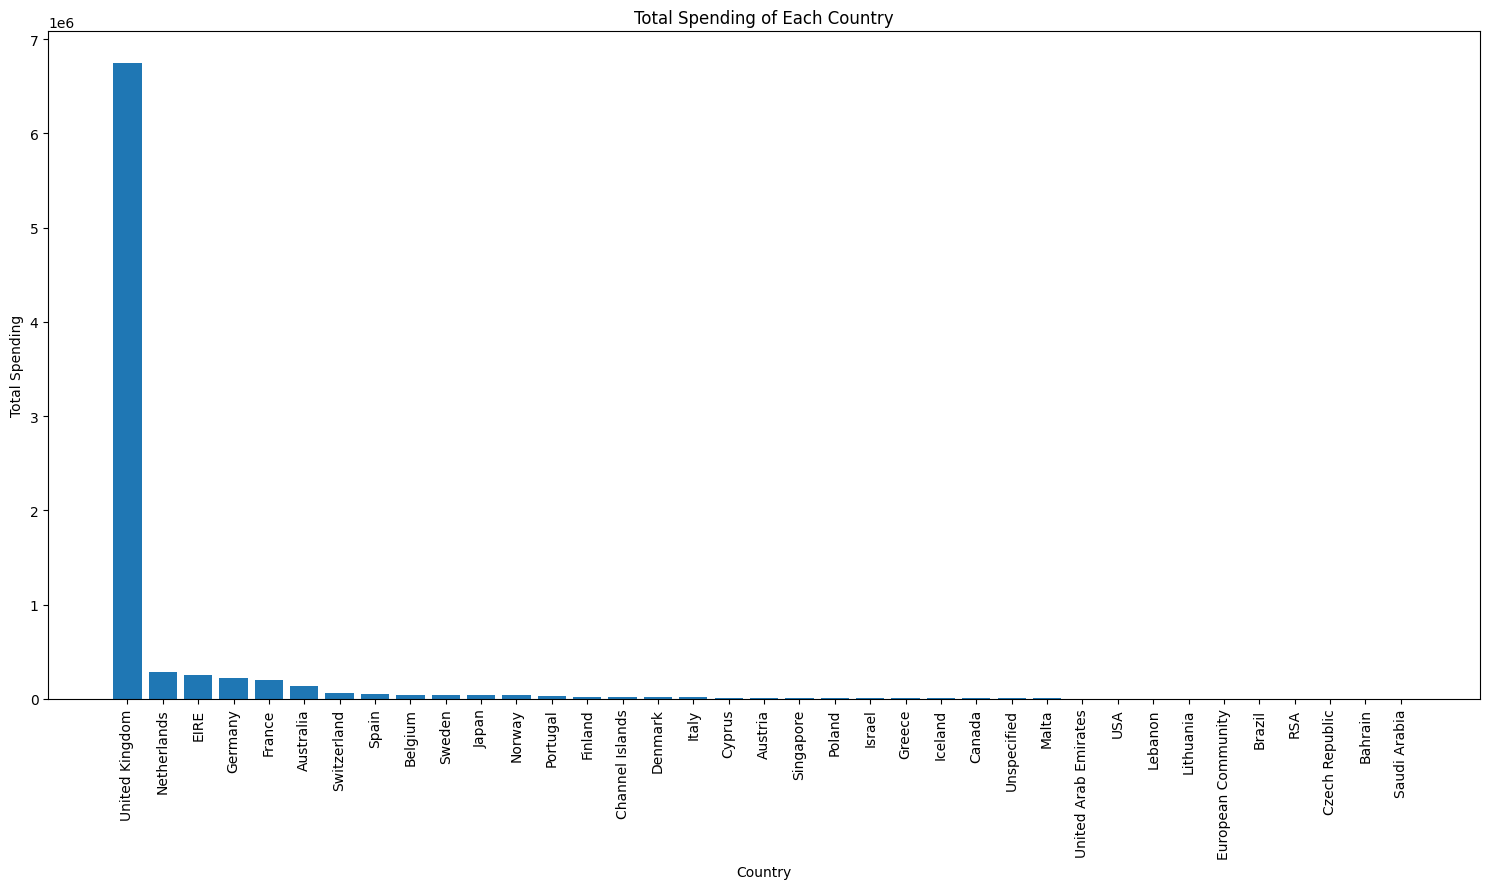

In [109]:

country_spending = df.groupby('Country')['total_bill'].sum()
country_spending = country_spending.sort_values(ascending=False)
plt.figure(figsize=(15, 9))
plt.bar(country_spending.index, country_spending.values)
plt.xlabel('Country')
plt.ylabel('Total Spending')
plt.title('Total Spending of Each Country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [110]:
group=pd.DataFrame(data.groupby(['Country','Description'])['GOV'].sum())
best=pd.DataFrame(group.groupby('Country')['GOV'].idxmax().values.tolist(),columns=['Country','Product'])
best['sales']=group.groupby('Country')['GOV'].max().values.tolist()
best['total sales']=group.groupby('Country')['GOV'].sum().values.tolist()
best=best.sort_values(by='total sales',ascending=False).head(5)
best['% of total sales']=best['sales']/best['total sales']

best.style.background_gradient(cmap=sns.light_palette("seagreen", as_cmap=True), subset=["% of total sales"])

,Country,Product,sales,total sales,% of total sales
35,United Kingdom,REGENCY CAKESTAND 3 TIER,102871.150000,6747156.154000,0.015247
23,Netherlands,RABBIT NIGHT LIGHT,9568.480000,284661.540000,0.033614
10,EIRE,REGENCY CAKESTAND 3 TIER,6936.150000,250001.780000,0.027744
14,Germany,POSTAGE,20821.000000,221509.470000,0.093996
13,France,POSTAGE,15065.000000,196626.050000,0.076618


C:\Users\vedan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


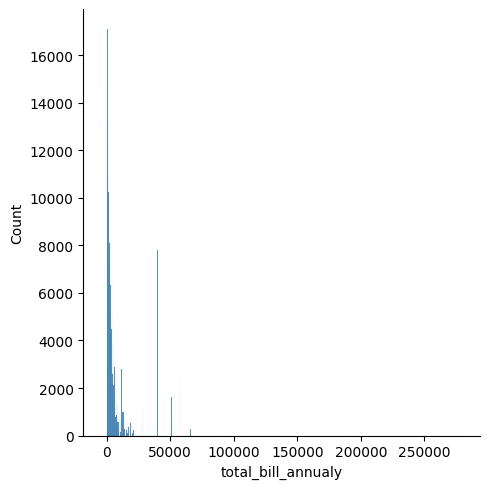

In [111]:
sns.displot(df['total_bill_annualy'])
plt.show()

**PREDECTIVE MODELING**

In [112]:
# Importing neccasary libraries and models
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error , r2_score

In [113]:
# Encoding Catgorical variables like Description and Country for regression models using LabelEncoder

In [114]:
df['Description'] = LabelEncoder().fit_transform(df['Description'])
df['Country'] = LabelEncoder().fit_transform(df['Country'])
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,total_bill,total_bill_annualy
0,536365,85123A,3716,6,2010-12-01 08:26:00,2.55,17850.0,35,12,2010,15.30,5303.48
1,536365,71053,3724,6,2010-12-01 08:26:00,3.39,17850.0,35,12,2010,20.34,5303.48
2,536365,84406B,861,8,2010-12-01 08:26:00,2.75,17850.0,35,12,2010,22.00,5303.48
3,536365,84029G,1813,6,2010-12-01 08:26:00,3.39,17850.0,35,12,2010,20.34,5303.48
4,536365,84029E,2776,6,2010-12-01 08:26:00,3.39,17850.0,35,12,2010,20.34,5303.48
...,...,...,...,...,...,...,...,...,...,...,...,...
401599,581578,22993,3063,12,2011-12-09 12:16:00,1.25,12713.0,14,12,2011,15.00,848.55
401600,581578,22907,2260,12,2011-12-09 12:16:00,0.85,12713.0,14,12,2011,10.20,848.55
401601,581578,22908,2261,12,2011-12-09 12:16:00,0.85,12713.0,14,12,2011,10.20,848.55
401602,581578,23215,1754,12,2011-12-09 12:16:00,2.08,12713.0,14,12,2011,24.96,848.55


In [115]:

x = df[['CustomerID','Description','Quantity','UnitPrice','Country','Month','Year']]
y = df['total_bill_annualy']

In [116]:
#spliting data in train nd test
x_train, x_test, y_train,y_test = train_test_split(x,y , test_size=0.25, random_state=123)




**LINAER REGRESSION**

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error , r2_score

In [118]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [119]:
y_pred = lin_reg.predict(x_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred)**0.5)
print('R2_LINEAR:', r2_score(y_test, y_pred))

MAE: 13406.849992713613
MSE: 790033174.2338222
RMSE: 28107.528782050944
R2_LINEAR: 0.11643698891735776


In [120]:
# Calculate required metrics on train data to check ofverfitting
y_pred_train = lin_reg.predict(x_train)
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:', mean_squared_error(y_train, y_pred_train)**0.5)
print('R2_LINEAR:', r2_score(y_train, y_pred_train))

MAE: 13529.510480896337
MSE: 815373637.0870395
RMSE: 28554.74806555014
R2_LINEAR: 0.11851888605362992


**DECISION TREE REGRESSOR**

In [121]:
dt_reg = DecisionTreeRegressor(random_state = 123)
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=123)

In [122]:
y_pred = dt_reg.predict(x_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred)**0.5)
print('R2_LINEAR:', r2_score(y_test, y_pred))

MAE: 225.21279272144696
MSE: 9005262.490988953
RMSE: 3000.876953656873
R2_LINEAR: 0.9899286294530046


In [123]:
#  checking overfitting
y_pred_train = dt_reg.predict(x_train)
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:', mean_squared_error(y_train, y_pred_train)**0.5)
print('R2_LINEAR:', r2_score(y_train, y_pred_train))

MAE: 2.573733429395979e-10
MSE: 1.380993596943698e-18
RMSE: 1.1751568392958014e-09
R2_LINEAR: 1.0


**RANDOM FOREST**

In [124]:
rf_reg = RandomForestRegressor(random_state=123)
rf_reg.fit(x_train, y_train)

RandomForestRegressor(random_state=123)

In [125]:
y_pred = rf_reg.predict(x_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred)**0.5)
print('R2_LINEAR:', r2_score(y_test, y_pred))

MAE: 282.1477545127983
MSE: 6921336.3822287265
RMSE: 2630.8432834794107
R2_LINEAR: 0.9922592657953526


In [126]:
y_pred_train = rf_reg.predict(x_train)
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:', mean_squared_error(y_train, y_pred_train)**0.5)
print('R2_LINEAR:', r2_score(y_train, y_pred_train))

MAE: 103.15703681712463
MSE: 800192.596760299
RMSE: 894.5348493827946
R2_LINEAR: 0.9991349307489462


**CUSTOMER'S SEGMENTATION WITH CLUSTERING**

In [127]:
#importing k-means
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [128]:
new_column_name = {'total_bill_annualy': 'Annual_Spending'}
df.rename(columns=new_column_name, inplace=True)
df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,total_bill,Annual_Spending
0,536365,85123A,3716,6,2010-12-01 08:26:00,2.55,17850.0,35,12,2010,15.30,5303.48
1,536365,71053,3724,6,2010-12-01 08:26:00,3.39,17850.0,35,12,2010,20.34,5303.48
2,536365,84406B,861,8,2010-12-01 08:26:00,2.75,17850.0,35,12,2010,22.00,5303.48
3,536365,84029G,1813,6,2010-12-01 08:26:00,3.39,17850.0,35,12,2010,20.34,5303.48
4,536365,84029E,2776,6,2010-12-01 08:26:00,3.39,17850.0,35,12,2010,20.34,5303.48
...,...,...,...,...,...,...,...,...,...,...,...,...
401599,581578,22993,3063,12,2011-12-09 12:16:00,1.25,12713.0,14,12,2011,15.00,848.55
401600,581578,22907,2260,12,2011-12-09 12:16:00,0.85,12713.0,14,12,2011,10.20,848.55
401601,581578,22908,2261,12,2011-12-09 12:16:00,0.85,12713.0,14,12,2011,10.20,848.55
401602,581578,23215,1754,12,2011-12-09 12:16:00,2.08,12713.0,14,12,2011,24.96,848.55


In [129]:
# The most recent date from the 'InvoiceDate' column
most_recent_date = df['InvoiceDate'].max()

# Calculate Recency based on the most recent date
rfm_data = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (most_recent_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'Annual_Spending': 'sum'
})
rfm_data.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'Annual_Spending': 'MonetaryValue'
}, inplace=True)

In [130]:
from mpl_toolkits.mplot3d import Axes3D
rfm_data.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,325,2,0.00
12347.0,1,7,784420.00
12348.0,74,4,55714.44
12349.0,18,1,128301.15
12350.0,309,1,5684.80


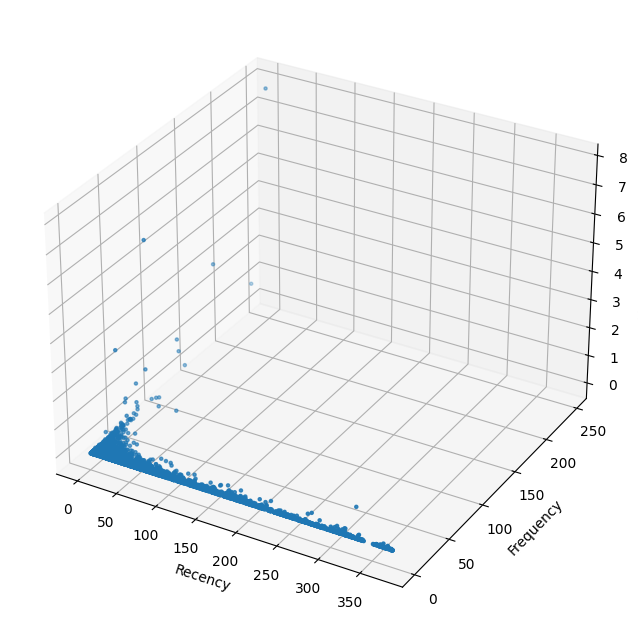

In [131]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')
xs=rfm_data.Recency
ys=rfm_data.Frequency
zs=rfm_data.MonetaryValue
ax.scatter(xs,ys,zs,s=5)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary value')
plt.show()

In [132]:
#Now Standardize the RFM metrics
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)

In [133]:
inertia_values = []
K_range = range(1, 11)  # Trying k values from 1 to 10
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia_values.append(kmeans.inertia_)

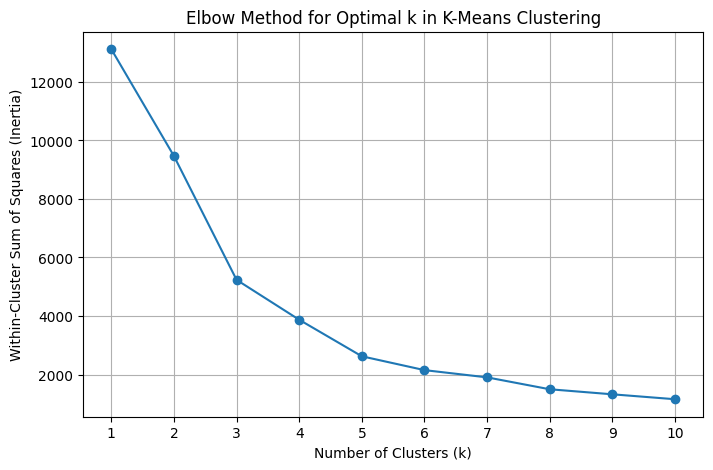

In [134]:
#Plotting the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal k in K-Means Clustering')
plt.xticks(K_range)
plt.grid(True)
plt.show()

In [135]:
#  K-Means clustering to create clusters based on RFM metrics
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_data['KMeans_Cluster'] = kmeans.fit_predict(rfm_scaled)

In [136]:
print("K-Means Clustering:")
print(rfm_data['KMeans_Cluster'].value_counts())

K-Means Clustering:
KMeans_Cluster
0    3255
1    1107
2       8
3       2
Name: count, dtype: int64


In [137]:
#Agglomerative Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4)
rfm_data['Agg_Cluster'] = agg_clustering.fit_predict(rfm_scaled)

In [138]:
print("\nAgglomerative Hierarchical Clustering:")
print(rfm_data['Agg_Cluster'].value_counts())


Agglomerative Hierarchical Clustering:
Agg_Cluster
0    3088
2    1241
1      41
3       2
Name: count, dtype: int64


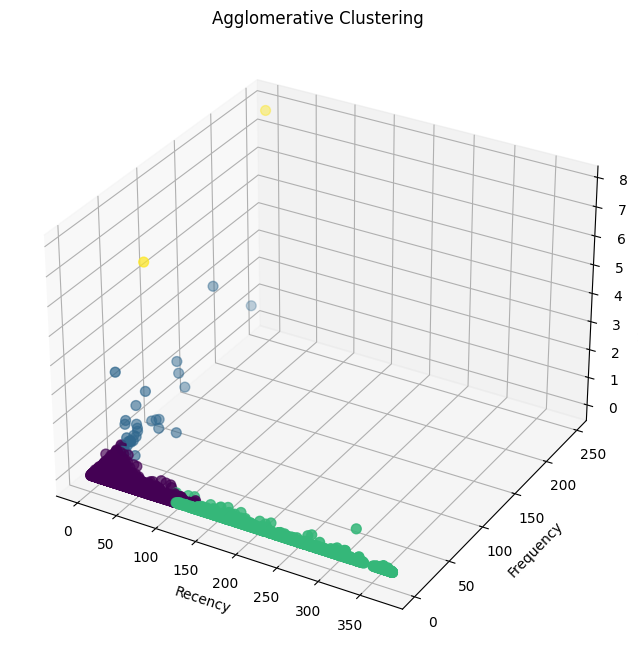

In [139]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm_data['Recency'], rfm_data['Frequency'], rfm_data['MonetaryValue'], c=rfm_data['Agg_Cluster'], cmap='viridis', s=50)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')
ax.set_title('Agglomerative Clustering')
plt.show()


---

## Author :  Vedant Ganesh Badukale
Indian Institute Of Information Technology